# Get and explore dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import pandas as pd
import keras
import tensorflow as tf

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
    return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [7]:
df = pd.DataFrame(data)

In [8]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

leng = [len(i) for i in data]

# creating the dataframe
df_fin = pd.DataFrame(labels,data).reset_index()

# adding the total words to the totalwords col 
df_fin["totalwords"] = df_fin["index"].str.split().str.len()

# calculating the STD and mean 
meanr = np.mean(leng)
STD = np.std(leng)
# - Perform any other dataset investigation that you feel would be valuable
 

In [9]:
# print the mean and STD of the Totalwords column 
print("mean :") 
print(meanr)
print("STD :") 
print(STD)

mean :
24.676519799219186
STD :
11.28405192884278


<AxesSubplot:>

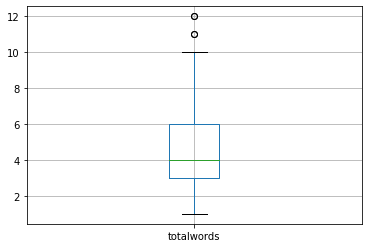

In [10]:
# Boxplot of the Totalwords column 
df_fin.boxplot(column ="totalwords" )

In [11]:
# - Calculate the number of unique words in the dataset
# getting the data reday to apply the count. 
unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


from collections import Counter
df = pd.DataFrame(data)
unique = Counter()
df[0].str.lower().str.split().apply(unique.update)


# convert the count item into a dataframe
df_counted = pd.DataFrame.from_dict(unique, orient = "index").reset_index()
df_counted


C:\Users\basti\AppData\Local\Temp/ipykernel_22192/1583998216.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


,index,0
0,one,45
1,of,177
2,the,290
3,best,44
4,crichton,2
...,...,...
2554,doublespeak,1
2555,visit,1
2556,okay,1
2557,reefer,1


In [23]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [24]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

from keras.preprocessing.sequence import pad_sequences

data4 = pad_sequences(tokenized_data, padding = "post" , maxlen = 4)
print(data4)


[[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 6  0  0  0]
 [ 0  0  0  0]]


In [25]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

X = data4
y= labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle = True)

print(X_train.shape)



(1434, 4)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def assess_model(model, X_test, y_test):  
    
   
    # confution matrix 
    y_test_arg=np.argmax(y_test,axis=1)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(y_test_arg, Y_pred))

    # clasification report 
    print("       ")
    print("classification_report")
    print(classification_report(to_class(y_test),Y_pred))

# Build and tune model

Define network architecture

In [27]:
#

inputdim = (np.max(X_train)+1)
outputdim = 10
inputlength = 4
ep = 5
bs = 10

# importing the layers needed from keras
from keras.layers import BatchNormalization
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [28]:

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


In [29]:
model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=keras.optimizers.Adam(),
                        metrics=["accuracy"])


Train model

Model 1

In [30]:

# outputdim of 10
inputdim = (np.max(X_train)+1)
outputdim = 10
inputlength = 4
ep = 5
bs = 10


X_train = tf.expand_dims(X_train, axis=-1)

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))

model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=keras.optimizers.Adam(),
                        metrics=["accuracy"])


In [31]:
history1 = model.fit(X_train, y_train, batch_size=bs, epochs=ep, validation_split=0.33 )

Epoch 1/5
96/96 [==============================] - 2s 16ms/step - loss: 0.7245 - accuracy: 0.4865 - val_loss: 0.7228 - val_accuracy: 0.5232
Epoch 2/5
96/96 [==============================] - 0s 5ms/step - loss: 0.7168 - accuracy: 0.5167 - val_loss: 0.7161 - val_accuracy: 0.5570
Epoch 3/5
96/96 [==============================] - 0s 5ms/step - loss: 0.7135 - accuracy: 0.5167 - val_loss: 0.7126 - val_accuracy: 0.5654
Epoch 4/5
96/96 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.5208 - val_loss: 0.7105 - val_accuracy: 0.5591
Epoch 5/5
96/96 [==============================] - 0s 5ms/step - loss: 0.7089 - accuracy: 0.5271 - val_loss: 0.7086 - val_accuracy: 0.5717


In [32]:
# save  model 1

model.save('M1')


INFO:tensorflow:Assets written to: M1\assets


In [33]:
m = keras.models.load_model('M1')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

12/12 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4930
score
0.4930362105369568


Model 2

In [34]:
# outputdim of 25
inputdim = (np.max(X_train)+1)
outputdim = 25
inputlength = 4
ep = 5
bs = 10


model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=keras.optimizers.Adam(),
                        metrics=["accuracy"])



In [35]:
history2 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )


Epoch 1/5
96/96 [==============================] - 1s 10ms/step - loss: 0.7278 - accuracy: 0.4896 - val_loss: 0.7301 - val_accuracy: 0.4494
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.4896 - val_loss: 0.7240 - val_accuracy: 0.4494
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.5125 - val_loss: 0.7178 - val_accuracy: 0.4494
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5719 - val_loss: 0.7133 - val_accuracy: 0.5633
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5927 - val_loss: 0.7099 - val_accuracy: 0.5633


In [36]:
# save  model 2

model.save('M2')


INFO:tensorflow:Assets written to: M2\assets


In [37]:
# evaluate model 2

m = keras.models.load_model('M2')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.5460
score
0.5459610223770142


Model 3

In [38]:

# outputdim of 50
inputdim = (np.max(X_train)+1)
outputdim = 50
inputlength = 4
ep = 5
bs = 10


model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=keras.optimizers.Adam(),
                        metrics=["accuracy"])


In [39]:
history3 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )

Epoch 1/5
96/96 [==============================] - 1s 10ms/step - loss: 0.7055 - accuracy: 0.5167 - val_loss: 0.7038 - val_accuracy: 0.5506
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5813 - val_loss: 0.7016 - val_accuracy: 0.5928
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.6083 - val_loss: 0.6990 - val_accuracy: 0.6392
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.6125 - val_loss: 0.6974 - val_accuracy: 0.5865
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.6208 - val_loss: 0.6954 - val_accuracy: 0.5949


In [40]:
# save  model 3

model.save('M3')



INFO:tensorflow:Assets written to: M3\assets


In [41]:
# evaluate model 3
m = keras.models.load_model('M3')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.6184
score
0.6183844208717346


Model 4

In [42]:
# outputdim of 100
inputdim = (np.max(X_train)+1)
outputdim = 100
inputlength = 4
ep = 5
bs = 10



model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=keras.optimizers.Adam(),
                        metrics=["accuracy"])




In [43]:
history4 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )


Epoch 1/5
96/96 [==============================] - 1s 10ms/step - loss: 0.7183 - accuracy: 0.5104 - val_loss: 0.7141 - val_accuracy: 0.5506
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5104 - val_loss: 0.7096 - val_accuracy: 0.5506
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5104 - val_loss: 0.7071 - val_accuracy: 0.5506
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5104 - val_loss: 0.7054 - val_accuracy: 0.5506
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.5104 - val_loss: 0.7039 - val_accuracy: 0.5506


In [44]:
# save  model 4

model.save('M4')



INFO:tensorflow:Assets written to: M4\assets


In [45]:
# evaluate model 4
m = keras.models.load_model('M4')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4735
score
0.4735375940799713


From the above we can see that model 3 has the best score. 

# Examine performance of model

Picking the final model based on score : model 3 has the highest score 

In [47]:
#based on the score and final evaluation the best model to use is model3

model = keras.models.load_model('M3')

In [48]:
metric_values = model.evaluate(x= X_test, y= y_test)

print('Final TEST performance')
for metric_value, metric_name in zip(metric_values, model.metrics_names):
  print('{}: {}'.format(metric_name, metric_value))

12/12 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.6184
Final TEST performance
loss: 0.6953694224357605
accuracy: 0.6183844208717346


In [49]:
assess_model(model, X_test, y_test)   

Confusion Matrix
[[129  60]
 [ 77  93]]
       
classification_report
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       189
           1       0.61      0.55      0.58       170

    accuracy                           0.62       359
   macro avg       0.62      0.61      0.61       359
weighted avg       0.62      0.62      0.62       359



Plot graphs for accuracy and loss

In [50]:


#getting the Keys of histoy to see what to graph
print(history3.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


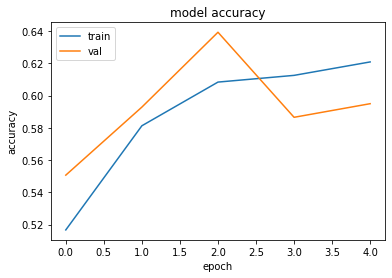

In [51]:
# Plot of the Accuracy of the model

import keras
from matplotlib import pyplot as plt

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

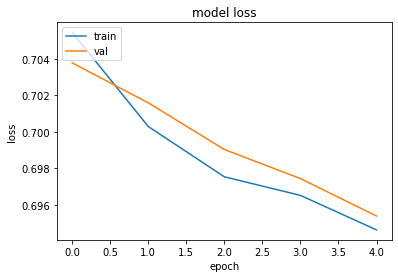

In [52]:
# Plot of the Accuracy of the model

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# this code was adatped form https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

# Make a prediction

In [53]:
model = keras.models.load_model('M3')

In [54]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)


# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.


data_test = to_word_label(padded)
print(data_test)

data_1 = []
for i in range(0,5):
    d = data_test[i]
    if d == 'positive':
        data_1.append(0)
    else:
        data_1.append(1)
print(data_1)


pred = model.predict(data_1)

for i in range(0,5):
    
    print(i)
    print("predition")
    print(pred[i])
    print("test data")
    print(data_1[i])
    print("       ")

['negative', 'positive', 'negative', 'positive', 'positive']
[1, 0, 1, 0, 0]
0
predition
[0.23548403 0.2722786 ]
test data
1
       
1
predition
[0.22528875 0.31367067]
test data
0
       
2
predition
[0.23548403 0.2722786 ]
test data
1
       
3
predition
[0.22528875 0.31367067]
test data
0
       
4
predition
[0.22528875 0.31367067]
test data
0
       
